In [5]:
# Test for the estimation of a single image key-points

import argparse
import grpc
import io
import matplotlib.pyplot as plt
import generic_box_pb2
import generic_box_pb2_grpc
from scipy.io import savemat, loadmat
import PIL.Image as PIL_image
import cv2
import numpy as np

## These functions assume the matlab file has one image in variable "image"

In [6]:


def SendEmptyMessage(stub):
    request = generic_box_pb2.Empty()
    return stub.Sift_All(request)

def ShowResponse(response,img1Path,img2Path):
    Dict = loadmat(io.BytesIO(response.file))
    savemat("./FeatureData.mat",Dict,long_field_names=True, do_compression=True)
    print(Dict)
    matched_points = Dict['PXL_20241017_160003417_PXL_20241017_160009267']

    image = cv2.imread(img1Path) 
    img1 = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

    image = cv2.imread(img2Path) 
    img2 = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

    # Extract points from the matched points matrix
    points1 = matched_points[:, :2]  # First 2 columns
    points2 = matched_points[:, 2:]  # Last 2 columns

    # Create a figure to display the images side by side
    fig, ax = plt.subplots(1, 1, figsize=(15, 6))
    # Create a new image that combines both images side by side
    combined_img = np.hstack((img1, img2))

    # Plot the combined image
    ax.imshow(combined_img)

    # Define a color map for different points
    num_pairs = len(points1)  # Number of matched pairs
    color_map = np.random.rand(num_pairs,3)

    # Plot image 1 with matched points
    # Draw lines and points
    for i in range(num_pairs):
        color = (color_map[i,0], color_map[i,1], color_map[i,2]) # Cycle through colors
        # Draw points in the first image
        ax.scatter(points1[i, 0], points1[i, 1], marker='o', color=color, edgecolor='black', s=100)  # s is size
        # Draw points in the second image (offset by the width of the first image)
        ax.scatter(points2[i, 0] + img1.shape[1], points2[i, 1], marker='o', color=color, edgecolor='black', s=100)

        # Draw lines connecting matched points
        ax.plot([points1[i, 0], points2[i, 0] + img1.shape[1]], 
                [points1[i, 1], points2[i, 1]], color=color, linestyle='-', linewidth=1)

    plt.tight_layout()
    plt.show()

### Rotina de teste: cria stub para o serviço,chama função que envia mensagem
Target - Nó onde está a correr o serviço

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Fri Nov 15 14:44:50 2024', '__version__': '1.0', '__globals__': [], 'PXL_20241017_160003417_PXL_20241017_160009267': array([[ 704.89788818, 2411.29370117,  728.01849365, 2118.93969727],
       [ 707.95849609, 2317.01464844,  732.73876953, 2049.21386719],
       [ 709.98748779, 2310.07104492,  736.52557373, 2044.35449219],
       ...,
       [3465.953125  , 3484.3293457 , 3464.17700195, 2158.15063477],
       [3466.24731445, 2966.1574707 , 3464.91259766, 2700.33642578],
       [3468.02026367, 2202.79223633, 3468.38476562, 2682.08764648]]), 'PXL_20241017_160003417_PXL_20241017_185639847': array([[ 718.78417969, 2308.60400391,  540.59643555, 2103.22412109],
       [ 830.15594482,  328.38247681,  967.41760254, 4288.91650391],
       [ 882.41516113,  847.39050293,  902.88903809, 3766.10229492],
       ...,
       [3464.109375  , 2031.2746582 , 3344.04907227, 1874.28161621],
       [3464.15527344, 2369.98974609, 3119.16821289,

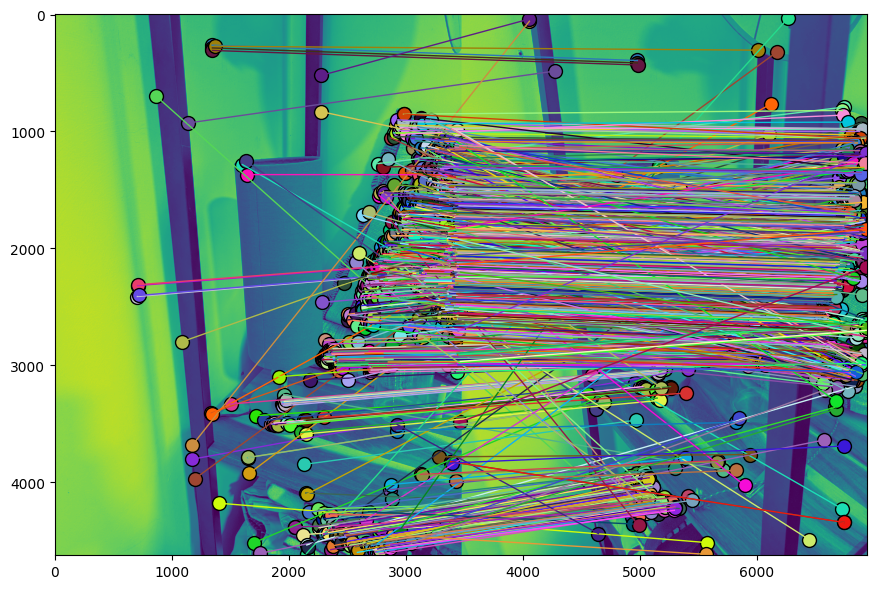

In [7]:
    target = 'localhost:8061'
    with grpc.insecure_channel(target) as channel:
        estimator_stub = generic_box_pb2_grpc.GenericBoxServiceStub(channel)
        try:
            response = SendEmptyMessage(estimator_stub)
            ShowResponse(response,"./inputImages/PXL_20241017_160003417.jpg","./inputImages/PXL_20241017_160009267.jpg")
        except grpc.RpcError as rpc_error:
            print('An error has occurred:')
            print(f'  Error Code: {rpc_error.code()}')
            print(f'  Details: {rpc_error.details()}')


In [8]:
response.

SyntaxError: invalid syntax (2615864601.py, line 1)